# Les catégories

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fr_videos = pd.read_csv("../data/FRvideos.csv")

In [7]:
#fr_cat = pd.read_json("../data/FR_category_id.json")
cat_fr = pd.read_json("../data/FR_category_id.json")

### création d'un dict de catégories

In [8]:
dic_cat_fr = {}
for x in range(cat_fr.shape[0]):
    ident = cat_fr.iloc[x,2]["id"]
    title = cat_fr.iloc[x,2]["snippet"]["title"]
    dic_cat_fr[ident] = title
print(dic_cat_fr)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


### Traduire les noms des catégories

Film et animation
Autos et véhicules
La musique
Animaux et animaux
Des sports
Courts métrages
Voyages et événements
Gaming
Vidéoblogging
Personnes et blogs
La comédie
Divertissement
Actualités et politique
Comment styliser
Éducation
Technologie scientifique
Films
Anime / Animation
Action / aventure
Classiques
La comédie
Documentaire
Drame
Famille
Étranger
Horreur
Science-fiction / Fantaisie
Thriller
Short
Spectacles
Bandes annonces

# ?
a quoi correspond la catégorie "Foreign" (Étranger)

### intégration de la liste dans le DataFrame fr_videos

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
fr_videos["category"] = ""
for x, y in dic_cat_fr.items():
    filtre = fr_videos["category_id"] == int(x)
    fr_videos["category"][filtre] = y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
fr_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment


## Visualisation

### Nombres de vidéos par catégories (avec seaborn)

In [19]:
#fr_videos['views_log'] = np.log(fr_videos['views'] + 1)

In [ ]:
cat_df_fr = fr_videos['category'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
#ax2 = sns.barplot(y='views_log',x=cat_df_fr['category'], data=fr_videos, orient='h')
plt.xlabel("Nombre de vidéos")
plt.ylabel("Catégories")
plt.title("Nombres de vidéos par catégories")

In [15]:
fr_videos['views_log'] = np.log(fr_videos['views'] + 1)

Vidéos par catégorie (nb)
Entertainment     9819
People & Blogs    5719
Comedy            4343
Sports            4342
Music             3946
Name: category, dtype: int64


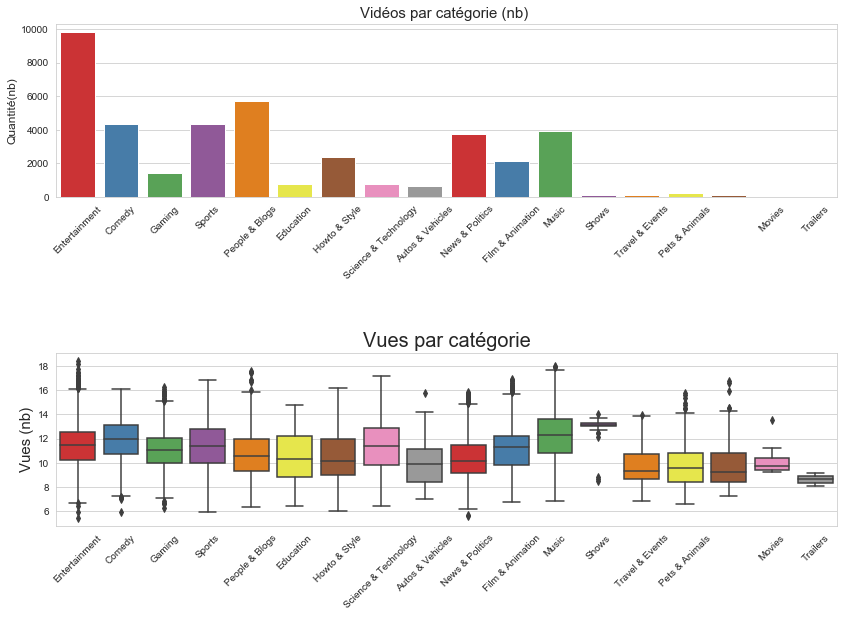

In [16]:
print("Vidéos par catégorie (nb)")
print(fr_videos.category.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category', data=fr_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Vidéos par catégorie (nb) ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Quantité(nb)", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category', y='views_log', data=fr_videos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Vues par catégorie", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Vues (nb)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

In [23]:
print(fr_videos.category.value_counts())

Entertainment           9819
People & Blogs          5719
Comedy                  4343
Sports                  4342
Music                   3946
News & Politics         3752
Howto & Style           2361
Film & Animation        2157
Gaming                  1459
Science & Technology     802
Education                769
Autos & Vehicles         673
Pets & Animals           237
Travel & Events          119
                         114
Shows                     99
Movies                    11
Trailers                   2
Name: category, dtype: int64
